In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [149]:
data = pd.read_csv("../raw_data/Makefile.csv")

In [150]:
data.head(3)

,_sdc_source_key_id,sku,date,item price,item quantity,line-item discount,price_qty,vendor,title,product_type,tags,email,gender,age,city
0,4.153860e+12,3.60717E+12,2023/9/21,290,1,0.0,290.0,SMCP-Offline,290/SWEATER/SANDRO/WOMEN/S30019E20/NOIR/3,NaN,NaN,da316cb7d636def8f9b100292cb263d6,female,45.0,Hong Kong
1,3.701330e+12,3.61423E+12,2026/3/21,375,1,0.0,375.0,CotyPremium-Online,Daisy Eau So Fresh EDT 75ml Giftset,Fragrance,"Giftset, Marc Jacobs",2fe4919dbaafdba2ad1f64a4b0dae67e,female,34.0,Hong Kong
2,4.153850e+12,3.6616E+12,2023/9/21,690,1,0.0,690.0,SMCP-Offline,690/SHIRT/MAJE/WOMEN/MFPCM00014Rose/ROSE/T2,NaN,NaN,2799831aea8aafc9a907aec8ab11b4c4,female,31.0,Hong Kong


In [151]:
data['gender'].nunique()

2

In [152]:
data['gender'].isnull().sum()

0

(array([176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

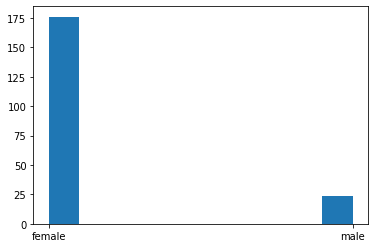

In [153]:
plt.hist(data['gender'])

In [154]:
# ohe = OneHotEncoder()
# data[['gender']]= data[['gender']].todense()
# gender_encoded = ohe.fit_transform(data[['gender']]) # gender encoded
# data["male"],data["female"] = gender_encoded.T

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data['gender_encoded'] = ord_enc.fit_transform(data[["gender"]])
data[["gender", "gender_encoded"]].head(11)
data.head()



,_sdc_source_key_id,sku,date,item price,item quantity,line-item discount,price_qty,vendor,title,product_type,tags,email,gender,age,city,gender_encoded
0,4.153860e+12,3.60717E+12,2023/9/21,290,1,0.0,290.0,SMCP-Offline,290/SWEATER/SANDRO/WOMEN/S30019E20/NOIR/3,NaN,NaN,da316cb7d636def8f9b100292cb263d6,female,45.0,Hong Kong,0.0
1,3.701330e+12,3.61423E+12,2026/3/21,375,1,0.0,375.0,CotyPremium-Online,Daisy Eau So Fresh EDT 75ml Giftset,Fragrance,"Giftset, Marc Jacobs",2fe4919dbaafdba2ad1f64a4b0dae67e,female,34.0,Hong Kong,0.0
2,4.153850e+12,3.6616E+12,2023/9/21,690,1,0.0,690.0,SMCP-Offline,690/SHIRT/MAJE/WOMEN/MFPCM00014Rose/ROSE/T2,NaN,NaN,2799831aea8aafc9a907aec8ab11b4c4,female,31.0,Hong Kong,0.0
3,3.701340e+12,5.0282E+12,2026/3/21,112,2,0.0,224.0,The Body Shop-Online,Tea Tree Skin Clearing Mattifying Toner 250ml,Skincare,Toner,5ace38451889a7dea97a124d4722e9b3,female,4.0,Hong Kong,0.0
4,3.701350e+12,3.61423E+12,2026/3/21,300,1,0.0,300.0,CotyPremium-Online,Boss Bottled EDT 50ml (Limited Edition),Fragrance,Hugo Boss,04f928de2dca0e75ebfa9619f58fcd21,male,45.0,Hong Kong,1.0


(array([ 6., 12., 69., 70., 34.,  0.,  0.,  0.,  1.,  1.]),
 array([  4. ,  15.7,  27.4,  39.1,  50.8,  62.5,  74.2,  85.9,  97.6,
        109.3, 121. ]),
 <BarContainer object of 10 artists>)

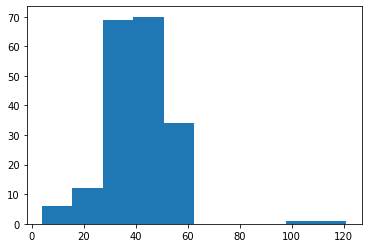

In [155]:
plt.hist(data['age'])

In [141]:
data['age'].isnull().sum()


7

In [142]:
age_mean = data['age'].mean().astype(int)
age_mean

40

In [160]:
#replace missing or 0 age values with mean value
imputer = SimpleImputer(strategy="mean")
imputer.fit(data[['age']])
data['age'] = imputer.transform(data[['age']]) 


In [161]:
data['age'].isnull().sum()

0

In [145]:
#replace all ages below 15 and above 85 with mediam
# data['age'] = data.age.replace([data['age'] < 15 ], age_mean, inplace=True) #Replace NaN by "NoAlley"
data['age'] = data['age'].astype(int)
data['age'] = data['age'].replace([data['age'] < 15 ],age_mean, inplace=True)
# index_below_fifteen = data[data['age'] < 15 ].index
# index_above_ninety = data[data['age'] > 90 ].index

# data['age'] = data.age.replace([data['age'] < 15 ], age_mean, inplace=True) #Replace NaN by "NoAlley"
# # data['age'] = data.age.replace(index_above_ninety, age_mean, inplace=True) #Replace NaN by "NoAlley"



In [146]:
data['age'].value_counts()#Check count of each category


Series([], Name: age, dtype: int64)

(array([ 1.,  2.,  8., 18., 36., 37., 35., 31., 17.,  8.]),
 array([11. , 16.1, 21.2, 26.3, 31.4, 36.5, 41.6, 46.7, 51.8, 56.9, 62. ]),
 <BarContainer object of 10 artists>)

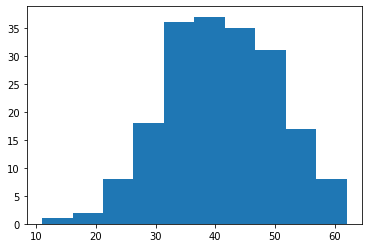

In [158]:
data['age'] = data['age'].map(lambda x: age_mean if (x < 10 or x > 90) else x)
plt.hist(data['age'])

In [159]:
data['age'].isnull().sum()

7